In [ ]:
import numpy as np
import cv2
import pandas as pd
import os
import pickle

In [ ]:
face_detection_model = '/content/drive/MyDrive/models/res10_300x300_ssd_iter_140000_fp16.caffemodel'
face_detection_proto='/content/drive/MyDrive/models/deploy.prototxt.txt'
face_descriptor='/content/drive/MyDrive/models/openface.nn4.small2.v1.t7'



detector_model=cv2.dnn.readNetFromCaffe(face_detection_proto,face_detection_model)
descriptor_model=cv2.dnn.readNetFromTorch(face_descriptor)

In [ ]:
import matplotlib.pyplot as plt
def display(img):
    plt.imshow(img[:,:,[2,1,0]])
    plt.show()

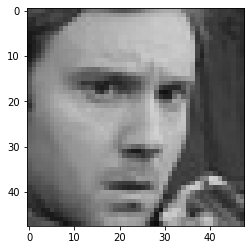

In [ ]:
img= cv2.imread('/content/drive/MyDrive/emotion_data/angry/0.jpg')
display(img)


In [ ]:
def helper(image_path): 
  img = cv2.imread(image_path)
  image= img.copy()
  h,w = image.shape[:2]
  img_blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),False)
  #set input
  detector_model.setInput(img_blob)
  detections = detector_model.forward()

  if len(detections) >0 :
    i = np.argmax(detections[0,0,:,2])
    confidence=detections[0,0,i,2]

    if confidence>0.5 : 
      box= detections[0,0,i,3:7]*np.array([w,h,w,h])
      startx,starty,endx,endy = box.astype('int')
      
      #face dectection
      img_draw=image.copy()
      cv2.rectangle(img_draw,(startx,starty),(endx,endy),(0,255,0),3)

      #feature extracxtion
      roi=image[starty:endy,startx:endx].copy()

      faceblob=cv2.dnn.blobFromImage(roi,1/255,(96,96),(0,0,0),True,True)
      descriptor_model.setInput(faceblob)
      vectors=descriptor_model.forward()
      return vectors
  return None


In [ ]:
data=dict(data=[],label=[])
folders = os.listdir('/content/drive/MyDrive/emotion_data')
for folder in folders:
  filenames=os.listdir('/content/drive/MyDrive/emotion_data/{}'.format(folder))
  for filename in filenames:
    try:
        vector=helper('/content/drive/MyDrive/emotion_data/{}/{}'.format(folder,filename))
        if vector is not None :
          data['data'].append(vector)
          data['label'].append(folder)
          print("Feature Extracted Successfully")
    except:
      pass


Streaming output truncated to the last 5000 lines.
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted S

NotADirectoryError: ignored

In [ ]:
data

In [ ]:
pd.Series(data['label']).value_counts()

In [ ]:
!pwd

In [ ]:
pickle.dump(data,open('/content/drive/MyDrive/emotion_data/data_emotion_features.pickle',mode='wb'))